In this Project we will classify written restaurant reviews, here we will predict a review is positive or negative

a positive review is represented in 1 and 0 for a negative review

This same algorithm can be used for other kinds of text, like books (to predict the gerne of book comedy, romance, etc), newspaper article (predicting the category of article)

In [23]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

#### Data Gathering

In [24]:
data_yelp = pd.read_csv("yelp_labelled.txt" , sep = "\t" , header= None) # laading the yelp data

In [25]:
data_yelp.columns = ["Review", "Sentiment"]

In [26]:
data_yelp.head()
# review and sentiment
# 0-Negative, 1-Positive for positive review

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [27]:
data_Amazon = pd.read_csv("amazon_cells_labelled.txt", sep= "\t", header = None) # laading the Amazon data

In [28]:
data_Amazon.columns = ["Review", "Sentiment"]

In [29]:
data_imdb = pd.read_csv("imdb_labelled.txt", sep = "\t", header= None) ## laading the imdb_labbeled data

In [30]:
data_imdb.columns = ["Review", "Sentiment"]  # renaming the columns 

In [31]:
data = data_imdb.append([data_Amazon , data_yelp], ignore_index= True) # Append all the data in a single dataframe

C:\Users\rotimi.kolawole.ZEDCREST\AppData\Local\Temp\ipykernel_15928\2907719763.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_imdb.append([data_Amazon , data_yelp], ignore_index= True) # Append all the data in a single dataframe


### Data Exploration

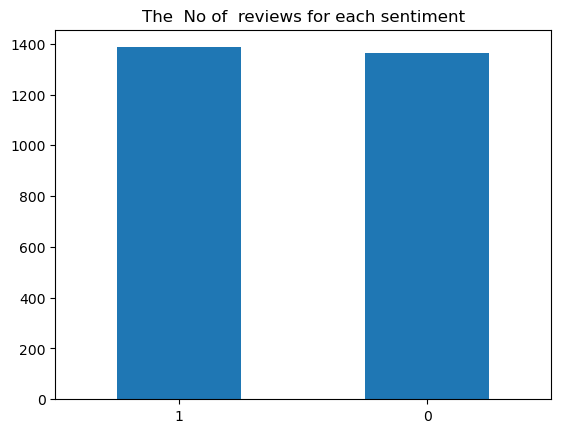

In [32]:
data["Sentiment"].value_counts().plot(kind = 'bar')
plt.title("The  No of  reviews for each sentiment")
plt.xticks(rotation = 360);

The data looks balanced for a classification project ( ie approximately same Number of samples for both sentiments)

In [33]:
# 1346 positive reviews
# 1362 Negative reviews

In [34]:
data.shape #

(2748, 2)

In [35]:
data.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [36]:
x = data["Review"]
y = data["Sentiment"]

### Data Preprocessing

In [37]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
import spacy

In [38]:
nlp = spacy.load("en_core_web_sm")

In [39]:
stop_words = list(nlp.Defaults.stop_words)

In [40]:
punct = string.punctuation

In [41]:
nlp = spacy.load("en_core_web_sm")

In [72]:
def cleaning_text_data(sentence):
    
    doc = nlp(sentence)
    
    toks = []
    
    for tok in doc:
        if tok.lemma_ != "-PRON-": # prn doesnt need to be lemmatized as its already at its simplest form and doesnt 
            temp = tok.lemma_.lower().strip()
        else:
            temp  = tok.lower_
        toks.append(temp)
        
        
    cleaned_data = [val for val in toks if val not in punct and val not in stop_words]
    
    return cleaned_data

# if root form of that word is not pronoun then it is going to convert that into lower form
# and if that word is a proper noun, then we are directly taking lower form, because there is no lemma for proper noun
    

In [73]:
cleaning_text_data("Hello all, It's a beautiful day outside there!")

['hello', 'beautiful', 'day', 'outside']

### Splitting the dataset

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
train_data , test_data, train_label , test_label = train_test_split(x , y , test_size= .3,shuffle = True)

In [86]:
train_data.shape  # 1923 samples in training data

(1923,)

In [87]:
test_data.shape  # 825 samples in training data

(825,)

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

### Vectorization Feature engineering  (TF-IDF)

Here,  feature engineering was performed using TF-IDF ( technique used to quantify the importance of text data)

In [89]:

Tfid = TfidfVectorizer(tokenizer= cleaning_text_data) # instatiating and passing the required cleaned data to the vectorizer
linear_svc = LinearSVC()

In [90]:
clf = Pipeline([("Vectorizer", Tfid), ("classifier", linear_svc)])

### Traing the model


In [91]:
clf.fit(train_data , train_label)

C:\Users\rotimi.kolawole.ZEDCREST\AppData\Local\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('Vectorizer',
                 TfidfVectorizer(tokenizer=<function cleaning_text_data at 0x000001373910FE20>)),
                ('classifier', LinearSVC())])

### Evaluating the model

In [99]:
Y_pred = clf.predict(test_data)

In [101]:
accuracy_score(Y_pred , test_label) # 78% accuracy

0.7842424242424243

In [97]:
confusion_matrix(Y_pred , test_label)

array([[313,  82],
       [ 96, 334]], dtype=int64)

In [98]:
print(classification_report(Y_pred , test_label))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       395
           1       0.80      0.78      0.79       430

    accuracy                           0.78       825
   macro avg       0.78      0.78      0.78       825
weighted avg       0.78      0.78      0.78       825



#### predicting some few text

In [30]:
clf.predict([" I love Amazon new products and service !"]) # returns a positive sentiment -- 1

array([1], dtype=int64)

In [31]:
clf.predict(["I didnt enjoy them that much!"]) # returns a negative sentiment -- 0

array([0], dtype=int64)

In [69]:
clf.predict(["Wow, I am learning Natural Language Processing in fun fashion!"])
# output is 1, that means review is positive

array([1], dtype=int64)